In [1]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

In [2]:
def perform_pca(X, num_components):
    # Standardize the Data
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std

    # Calculate Covariance Matrix
    cov_matrix = np.cov(X_standardized, rowvar=False)

    # Compute Eigenvectors and Eigenvalues
    eigenvalues, eigenvectors = eig(cov_matrix)

    # Sort Eigenvectors by Eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select Principal Components
    principal_components = eigenvectors[:, :num_components]

    # Transform the data
    transformed_data = np.dot(X_standardized, principal_components)

    return transformed_data

In [11]:
# Generate random data
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # 100 data points, 2 features

# Perform PCA with 2 components
num_components = 2
transformed_data = perform_pca(X, num_components)


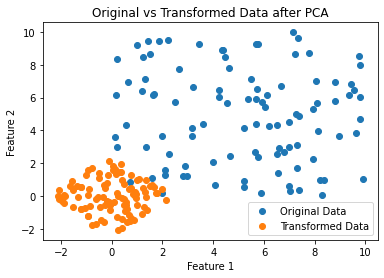

In [12]:
# Plot the original and transformed data
plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label='Transformed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original vs Transformed Data after PCA')
plt.show()
